In [17]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
import pandas as pd

df = pd.read_excel('관악구 2022.xlsx')

df

,title,대상,target
0,사서와 함께 하는 별별 그림책 탐독 시간,영유아,어린이
1,<종말의 아이들> 출간 기념 북토크,누구나,전연령
2,"[봉현 X 피치마켓] 찾아가는 시니어 디지털 금융교육 (1기 , 2기 접수)",성인,성인
3,(Zoom)아주 아주 느슨한 그림책 독서모임 2기,성인,성인
4,(Zoom)우리아이 문해력을 키우는 그림책 북큐레이션,성인,성인
5,"독서아카데미 '일상의 쉼표, 여행' 김요한의 <MBTI, 나와 너를 이어주는 다리>",누구나,전연령
6,2022 도서관다문화서비스 지원사업 – 작가와의 만남 : 우리는 모두 달라요,어린이,어린이
7,북아트로 고려를 알아보자go~,어린이,어린이
8,[현재 접수중입니다] 소소(小笑) 인문살롱 2. _ 책이는당나귀,성인,성인
9,[현재 접수중입니다] 소소(小笑) 인문살롱 1. _자상한시간,성인,성인


In [38]:
df1 = df.copy()

In [40]:
df1.to_csv('gwanak.csv', header=True)

In [19]:
import re
target = df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [20]:
text

'사서와 함께 하는 별별 그림책 탐독 시간 종말의 아이들 출간 기념 북토크 봉현 피치마켓 찾아가는 시니어 디지털 금융교육 기 기 접수 아주 아주 느슨한 그림책 독서모임 기 우리아이 문해력을 키우는 그림책 북큐레이션 독서아카데미 일상의 쉼표 여행 김요한의 나와 너를 이어주는 다리 도서관다문화서비스 지원사업 작가와의 만남 우리는 모두 달라요 북아트로 고려를 알아보자 현재 접수중입니다 소소 인문살롱 책이는당나귀 현재 접수중입니다 소소 인문살롱 자상한시간 현재 접수중입니다 소소 인문살롱 밝은책방 현재 접수중입니다 소소 인문살롱 이나영책방 정명섭 작가와 함께하는 도서관 열 초등학생을 위한 여름방학 독서클라쓰 고학년 추가 모집 독서와 함께하는 여름밤의 초등과학 프로그램 도서관에서 우주와 놀자 광복절 맞이 필사행사 하늘과바람과별과시 한 주제로 함께 읽기 내 멋대로 따라 그리기 현장참여 푸른숲작은도서관 추석 마음을 담은 선물포장수업'

In [31]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = ['접수','도서관','현재','프로그램','모집','아주','우리','지원','기념','달라','추가','광복절','맞이','행사','서비스']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
독서,4
인문,4
살롱,4
그림책,3
시간,2
...,...
추석,1
마음,1
선물,1
포장,1


In [32]:
df.index.to_list()

['독서',
 '인문',
 '살롱',
 '그림책',
 '시간',
 '아이',
 '작가',
 '책방',
 '사서',
 '별별',
 '탐독',
 '종말',
 '토크',
 '봉현',
 '피치',
 '마켓',
 '시니어',
 '디지털',
 '금융',
 '교육',
 '모임',
 '문해',
 '북큐',
 '레이',
 '아카데미',
 '일상',
 '쉼표',
 '여행',
 '요한',
 '다리',
 '다문화',
 '사업',
 '만남',
 '모두',
 '북아트',
 '고려',
 '당나귀',
 '이나영',
 '정명섭',
 '초등학생',
 '여름방학',
 '고학년',
 '여름밤',
 '초등',
 '과학',
 '우주',
 '필사',
 '하늘',
 '바람',
 '과시',
 '주제',
 '멋대로',
 '그리기',
 '현장',
 '참여',
 '푸른',
 '추석',
 '마음',
 '선물',
 '포장',
 '수업']

In [33]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')# 한글 폰트 설정

(-0.5, 3999.5, 2999.5, -0.5)

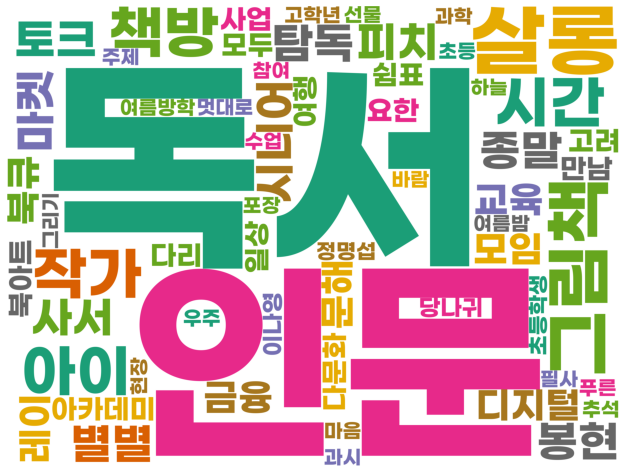

In [34]:
from wordcloud import WordCloud

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=100).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기